In [10]:
#mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [11]:
# import os
# os.mkdir("/content/gdrive/My Drive/Face_Mask_Detection")
# os.chdir("/content/gdrive/My Drive/Face_Mask_Detection")

# New Section

In [12]:
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [13]:
Dataset = '/content/gdrive/My Drive/fmdataset/dataset/dataset/train'
Data_Dir = os.listdir(Dataset)
print(Data_Dir)

['without_mask', 'with_mask']


In [14]:
img_rows, img_cols = 112, 112
images = []
labels = []

for category in Data_Dir:
  folder_path = os.path.join(Dataset, category)
  for img in os.listdir(folder_path):
    img_path = os.path.join(folder_path, img)
    img = cv2.imread(img_path)

    try:
      grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      resized_img = cv2.resize(grayscale_img, (img_rows, img_cols))
      images.append(resized_img)
      labels.append(category)
    except Exception as e:
      print('Exception:', e)

images = np.array(images)/255.0
images = np.reshape(images, (images.shape[0], img_rows, img_cols, 1))

#perform one hot encoding on labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
labels = np.array(labels)

(train_X, test_X, train_y, test_y) = train_test_split(images, labels, test_size=0.25, random_state=0)



In [15]:
#Building a CNN classification model
from keras.models import Sequential 
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D

num_classes = 2
batch_size = 32

model = Sequential()

#first layer
model.add(Conv2D(64, (3,3), input_shape=(img_rows, img_cols, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#second layer
model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#flatten and dropout layer
model.add(Flatten())
model.add(Dropout(0.5))

#softmax classifier
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 110, 110, 64)      640       
                                                                 
 activation (Activation)     (None, 110, 110, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 55, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 53, 53, 128)       73856     
                                                                 
 activation_1 (Activation)   (None, 53, 53, 128)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 128)      0         
 2D)                                                    

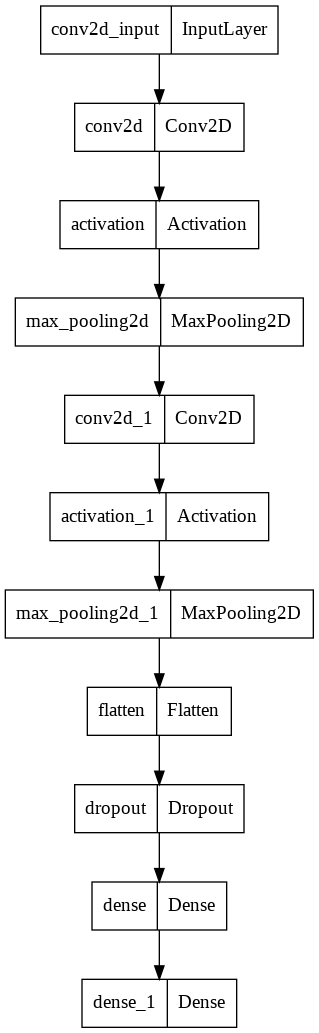

In [16]:
#plot model
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='/content/gdrive/My Drive/Face_Mask_Detection/face_mask_detection_architecture.png')

In [18]:
#train the model
from tensorflow.keras.optimizers import Adam

epochs=50
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
fitted_model = model.fit(train_X, train_y, epochs=epochs, validation_split=0.25)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
54/54 [==============================] - 13s 67ms/step - loss: 0.6986 - accuracy: 0.5786 - val_loss: 0.5807 - val_accuracy: 0.7374
Epoch 2/50
54/54 [==============================] - 3s 51ms/step - loss: 0.5657 - accuracy: 0.7191 - val_loss: 0.5508 - val_accuracy: 0.6974
Epoch 3/50
54/54 [==============================] - 3s 57ms/step - loss: 0.5308 - accuracy: 0.7458 - val_loss: 0.5241 - val_accuracy: 0.7461
Epoch 4/50
54/54 [==============================] - 3s 58ms/step - loss: 0.4896 - accuracy: 0.7748 - val_loss: 0.5076 - val_accuracy: 0.7791
Epoch 5/50
54/54 [==============================] - 3s 51ms/step - loss: 0.4570 - accuracy: 0.8096 - val_loss: 0.4868 - val_accuracy: 0.8261
Epoch 6/50
54/54 [==============================] - 3s 51ms/step - loss: 0.4102 - accuracy: 0.8775 - val_loss: 0.4281 - val_accuracy: 0.8696
Epoch 7/50
54/54 [==============================] - 3s 52ms/step - loss: 0.3430 - accuracy: 0.9251 - val_loss: 0.4086 - val_accuracy: 0.8730
Epoch 8/50
5

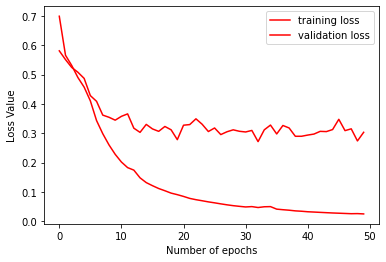

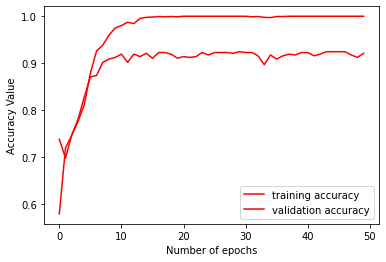

In [19]:
#plot training and validation loss
from matplotlib import pyplot as plt
plt.plot(fitted_model.history['loss'], 'r', label='training loss')
plt.plot(fitted_model.history['val_loss'], 'r', label='validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

#plot training and validation accuracy
plt.plot(fitted_model.history['accuracy'], 'r', label='training accuracy')
plt.plot(fitted_model.history['val_accuracy'], 'r', label='validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()

In [20]:
#save model
model.save('/content/gdrive/My Drive/Face_Mask_Detection/face_mask_detection.h5')